# **Credit-Card-Clustering**

# **Project Description**

The Credit Card Clustering project applies unsupervised machine learning to segment customers based on their transaction and behavioral data. By identifying distinct groups, businesses can enhance targeted marketing, personalized services, and customer retention.

# **Objective**

There are a lot of features in this dataset (18 behavioral features). We will now perform:


*   Data preprocessing
*   Clustering
*   Feature extraction to improve clustering
*   Experiment with clustering model: KMeans
*   Choosing the number of clusters














# **Data Description**

Following is the Data Dictionary for Credit Card dataset:

*   CUST_ID: Identification of Credit Card holder (Categorical)
*   BALANCE: Balance amount left in their account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFF_PURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)


*  PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
*   CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
*  CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX: Number of purchase transactions made
*  CREDIT_LIMIT: Limit of Credit Card for user
*  PAYMENTS: Amount of Payment done by user
*  MINIMUM_PAYMENTS: Minimum amount of payments made by user
* PRCFULLPAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user


































In [ ]:
#import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
#load the data
df=pd.read_csv('creditcard.csv')
print(df.head())
df.shape


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

(8950, 18)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Data Cleaning**


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates()
df.shape




(8636, 18)

In [ ]:
#drop ID column
df=df.drop('CUST_ID',axis=1)
#normalize values
scaler = StandardScaler()
cluster_data = df[['BALANCE','PURCHASES','CREDIT_LIMIT']]
cluster_data_scaled = scaler.fit_transform(cluster_data)


# **Clustering**

# **Correlation Check**

Text(0.5, 1.0, 'Correlation check')

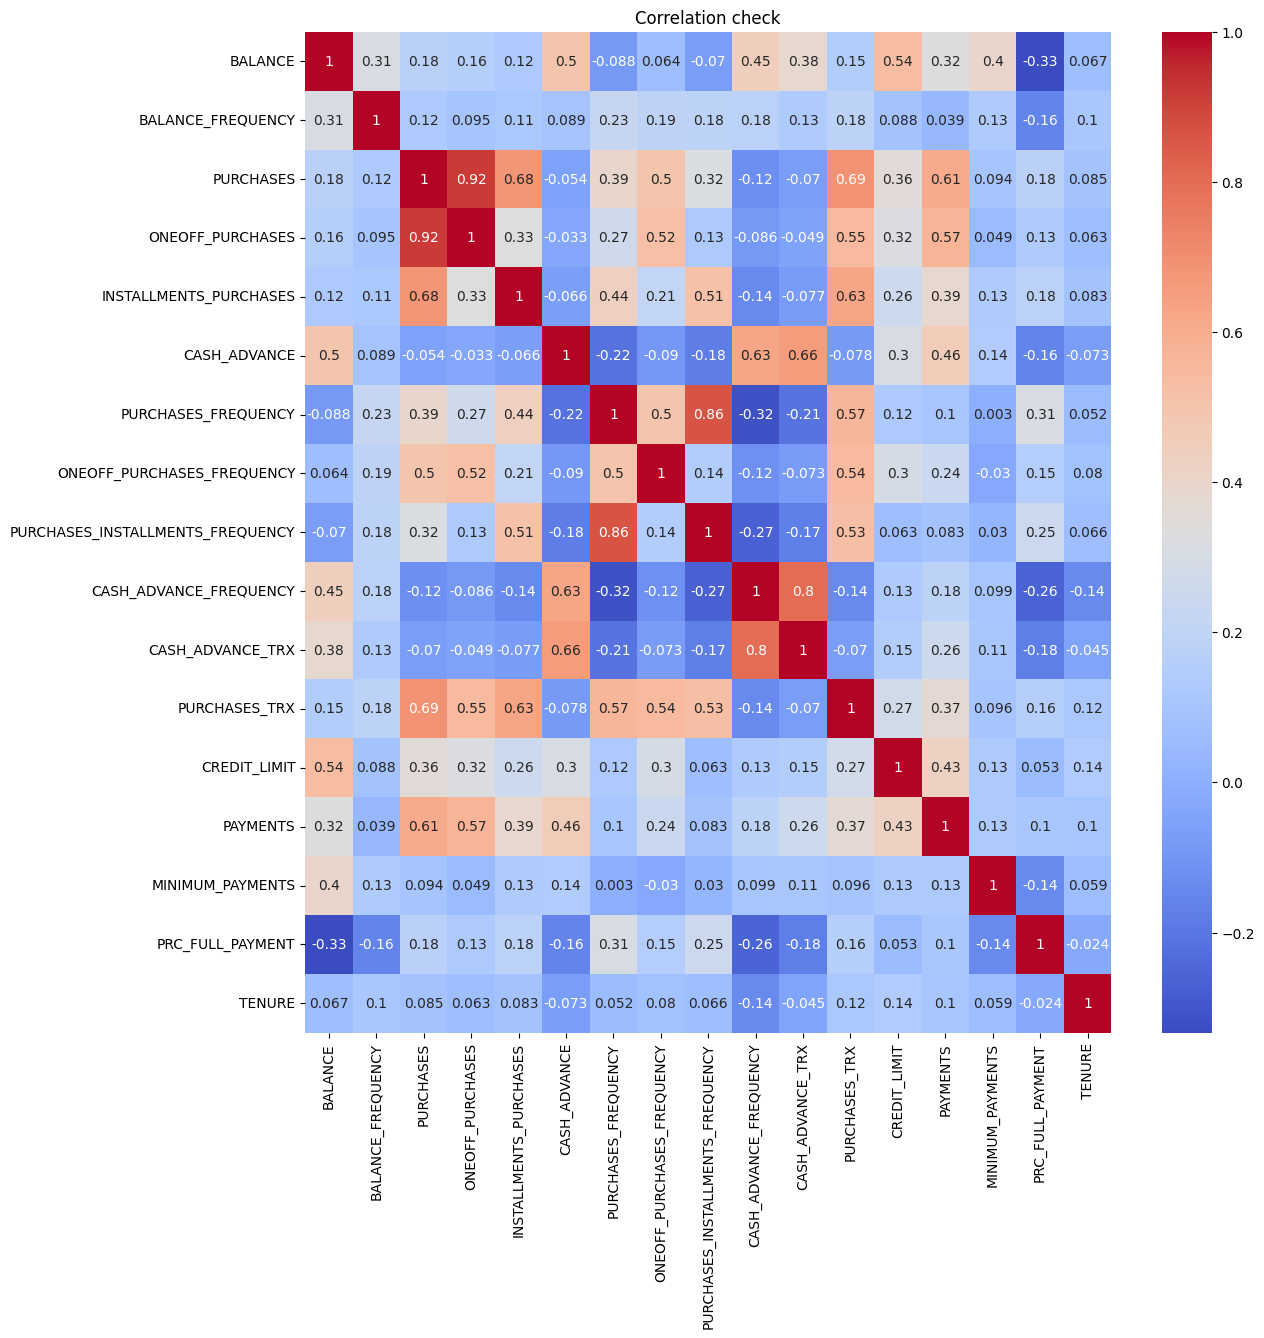

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',
            xticklabels=df.columns,
            yticklabels=df.columns)
plt.title("Correlation check")

# **Clustering using K-Means**

In [ ]:
kmeans = KMeans(n_clusters=3)
cluster = kmeans.fit_predict(cluster_data)
df['CREDIT_CARD_SEGMENTS']=cluster
df.head()
df['CREDIT_CARD_SEGMENTS'] = df['CREDIT_CARD_SEGMENTS'].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3"})
print("\nThe clustering are\n")
print(df['CREDIT_CARD_SEGMENTS'].head(10))


The clustering are

0     Cluster 2
1     Cluster 1
2     Cluster 1
4     Cluster 2
5     Cluster 2
6     Cluster 3
7     Cluster 2
8     Cluster 1
9     Cluster 1
10    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


# **Visualization using Pairplot**

# **Silhouette Scores**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

<Figure size 1000x600 with 0 Axes>

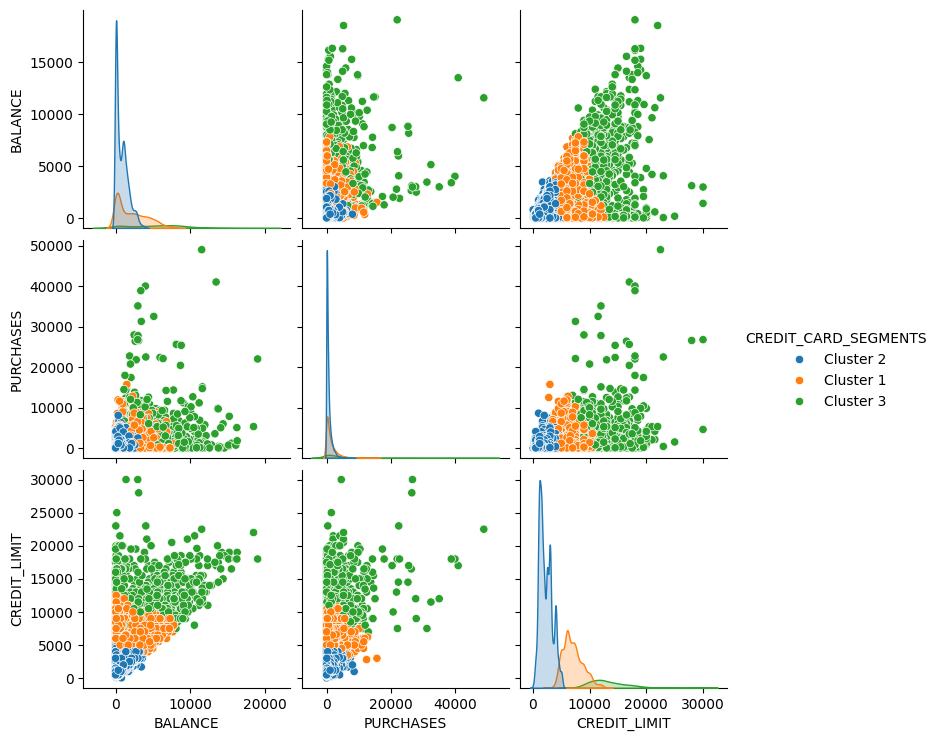

Silhouette Score: 0.4823085967342195


In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(df, hue='CREDIT_CARD_SEGMENTS', vars=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT'])
plt.show()


score = silhouette_score(cluster_data, cluster)
print(f'Silhouette Score: {score}')
